In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
data=pd.read_csv('bank-additional-full.csv', delimiter=';', header=0)
data=data.dropna()
print (data.shape)
print(list(data.columns))
data.head()

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
data['education'].unique()
data['education']

,education
0,Basic
1,high.school
2,high.school
3,Basic
4,high.school
...,...
41183,professional.course
41184,professional.course
41185,university.degree
41186,professional.course


In [ ]:
 data['y'].value_counts()




,count
y,
no,36548
yes,4640


<ipython-input-17-c5c062c92cb8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='hls')


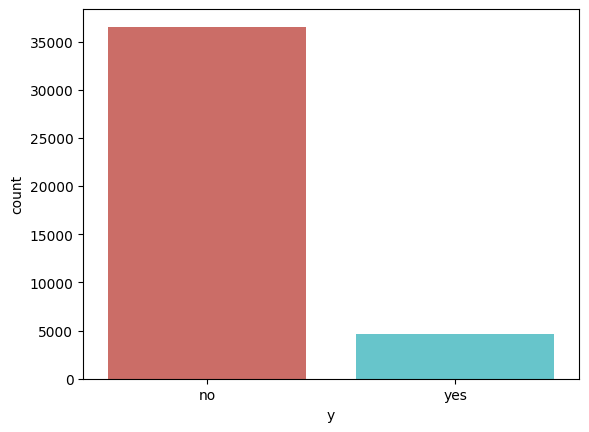

<Figure size 640x480 with 0 Axes>

In [ ]:
 sns.countplot(x='y', data=data, palette='hls')
 plt.show()
 plt.savefig('count_plot')


In [ ]:
count_no_sub = len(data[data['y']=='no'])
count_sub =  len(data[data['y']== 'yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_no_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_no_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [ ]:
data.groupby('y').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
data.groupby('marital').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750


In [ ]:
data.groupby('education').mean(numeric_only=True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


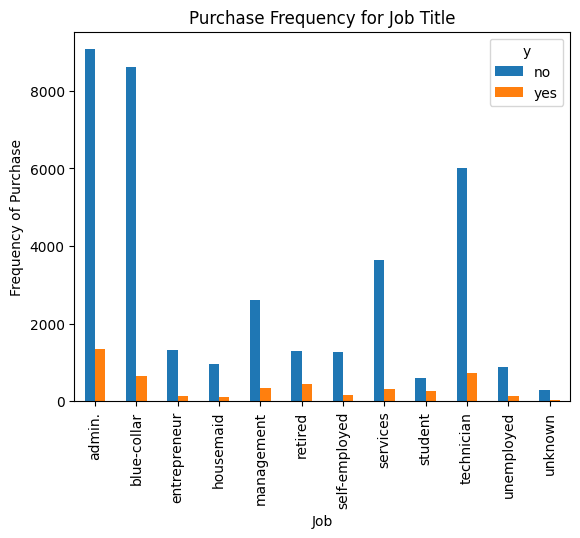

In [ ]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

Text(0, 0.5, 'proporsi dari jumlah customer')

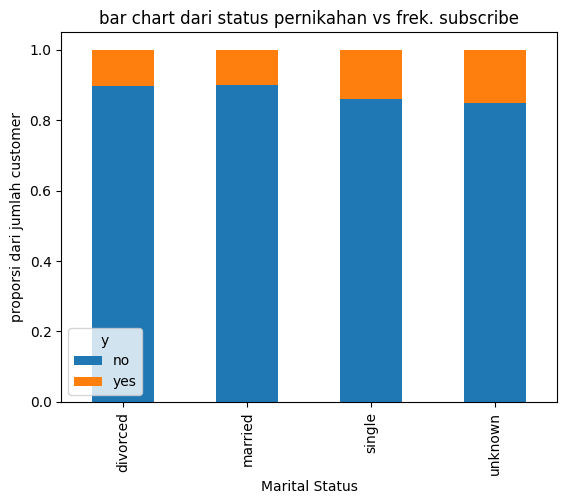

In [ ]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0 ).plot(kind='bar',stacked=True)
plt.title('bar chart dari status pernikahan vs frek. subscribe')
plt.xlabel('Marital Status')
plt.ylabel('proporsi dari jumlah customer')


Text(0, 0.5, 'proporsi dari jumlah customer')

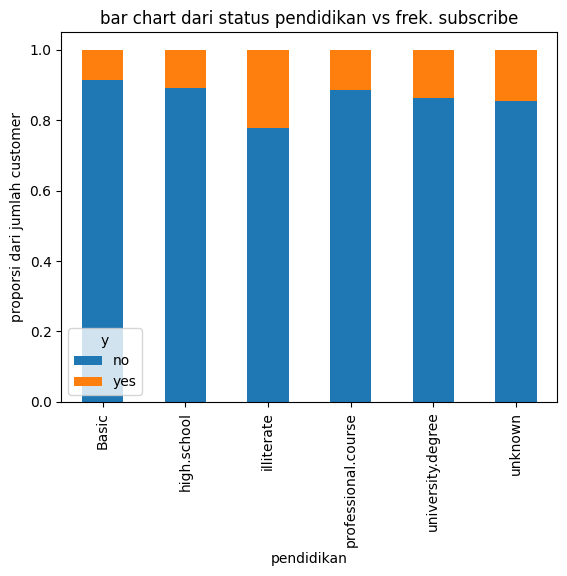

In [ ]:
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0 ).plot(kind='bar',stacked=True)
plt.title('bar chart dari status pendidikan vs frek. subscribe')
plt.xlabel('pendidikan')
plt.ylabel('proporsi dari jumlah customer')


Text(0, 0.5, 'jumlah customer')

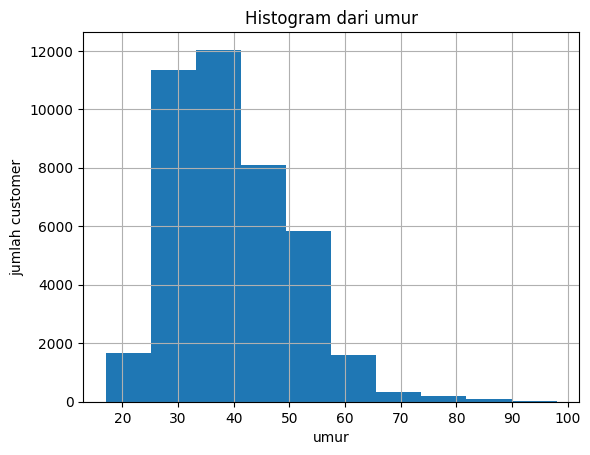

In [ ]:
data.age.hist()
plt.title('Histogram dari umur')
plt.xlabel('umur')
plt.ylabel('jumlah customer')

In [ ]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
print(cat_list)

       poutcome_failure  poutcome_nonexistent  poutcome_success
0                 False                  True             False
1                 False                  True             False
2                 False                  True             False
3                 False                  True             False
4                 False                  True             False
...                 ...                   ...               ...
41183             False                  True             False
41184             False                  True             False
41185             False                  True             False
41186             False                  True             False
41187              True                 False             False

[41188 rows x 3 columns]


In [ ]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [ ]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from re import X
x = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']== 'no']))
print("Number of subscription",len(os_data_y[os_data_y['y']== 'yes']))
print('proporsi yang tidak subscribe pada data setelah di-oversampled',len(os_data_y[os_data_y['y']== 'no'])/len(os_data_X))
print('proporsi yang subscribe pada data setelah di-oversampled',len(os_data_y[os_data_y['y']== 'yes'])/len(os_data_X))


length of oversampled data is  51158
Number of no subscription in oversampled data 25579
Number of subscription 25579
proporsi yang tidak subscribe pada data setelah di-oversampled 0.5
proporsi yang subscribe pada data setelah di-oversampled 0.5


In [ ]:
membuat program python yg bisa membaca suatu daata dan menerima fungsi outlier detection